# Image_Edge_Detection

影像邊緣檢測  
要得到一張影像的特徵點  
其中一手法就是先獲得影像的邊緣影像
在對其做特徵運算得到想要的結果

## Sobel

說道圖像邊緣檢測  
就必須提到Sobel運算子  
Sobel用於梯度檢測，利用Sobel運算子對圖像做卷積運算後得到的圖片就是原圖的梯度  
可以視作為影像有劇烈改變的點會被強化出來，所以可以用於檢測邊緣  
Sobel分為x與y方向，兩個方向來對原圖做檢測

$$ G_x =
\left[\begin{matrix}-1 & 0 & 1 \cr -2 & 0 & 2 \cr -1 & 0 & 1 \end{matrix}\right]    
\space\space\space\space\space\space\space\space\space\space\space\space
G_y =
\left[\begin{matrix}-1 & -2 & -1 \cr 0 & 0 & 0 \cr 1 & 2 & 1 \end{matrix}\right]$$

計算完以後再把X與Y方向的得到的圖加起來就可以獲得原圖的邊緣資訊  
一般在做梯度方向求邊緣  
先把圖像做過平滑濾波會得到較好的結果(雜訊較少)

In [1]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt

root = os.getcwd()
img_path = os.path.join(root,'Image/lena.jpg')

img = cv.imread(img_path,0)

img = cv.GaussianBlur(img,(5,5),0)

使用sobel函式直接呼叫opencv中的Sobel
Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])  
* src: 原圖
* ddepth:輸出圖像深度，輸出圖像深度必須比輸入的還高，這是因為在座運算的時候有可能數值會超出255(8bits)
* dx: x方向導數，可為0,1,2
* dy: y方向導數，可為0,1,2
* ksize: kernel size大小，可為1,3,5,7
* scale: 縮放係數
* delta: 常數項偏差值
* borderType: 圖像邊界判斷模式，默認BORDER_DEFAULT。

輸出圖必須要轉回uint8的數值  
需使用convertScaleAbs  

最後在使用addWeighted  
把x與y方向的梯度相加

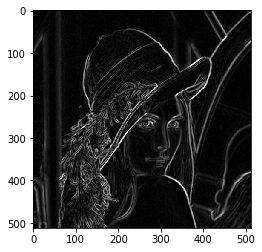

In [2]:
x = cv.Sobel(img,cv.CV_16S,1,0)
y = cv.Sobel(img,cv.CV_16S,0,1)
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)

res = cv.addWeighted(absX,0.5,absY,0.5,0)


plt.imshow(res[:,:],cmap='gray')

可以利用閥值處理來得到一張乾淨的邊緣圖像

(<matplotlib.axes._subplots.AxesSubplot at 0x2425a6a3588>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'threshold-edge'))

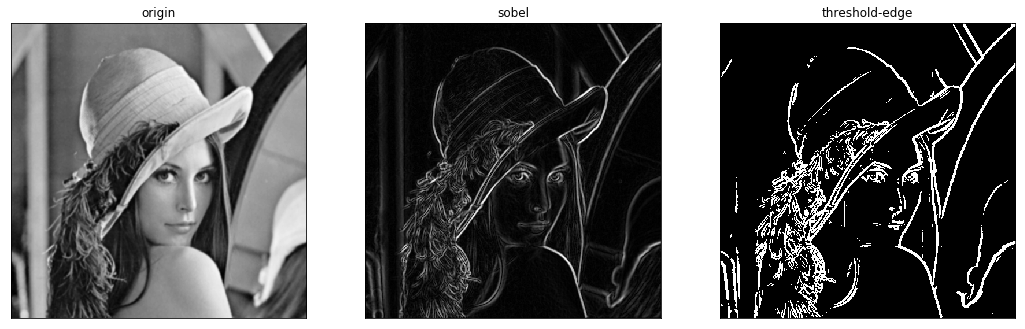

In [3]:
otsu1, res_theshould = cv.threshold(res, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1),plt.xticks([]),plt.yticks([]),plt.imshow(img,'gray'),plt.title('origin')
plt.subplot(1,3,2),plt.xticks([]),plt.yticks([]),plt.imshow(res,'gray'),plt.title('sobel')
plt.subplot(1,3,3),plt.xticks([]),plt.yticks([]),plt.imshow(res_theshould,'gray'),plt.title('threshold-edge')

## Scharr

scharr在kernel=(3,3)的時候得到的效果較Sobel來得好  
使用方法與Sobel函式大同小異  

$$ G_x =
\left[\begin{matrix}-3 & 0 & 3 \cr -10 & 0 & 10 \cr -3 & 0 & 3 \end{matrix}\right]    
\space\space\space\space\space\space\space\space\space\space\space\space
G_y =
\left[\begin{matrix}-3 & -10 & -3 \cr 0 & 0 & 0 \cr 3 & 10 & 3 \end{matrix}\right]$$

也可以用
Sobel(..., borderType = cv,CV_SCHARR)，可以得到一樣的效果

(<matplotlib.axes._subplots.AxesSubplot at 0x2425a840320>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'threshold-edge'))

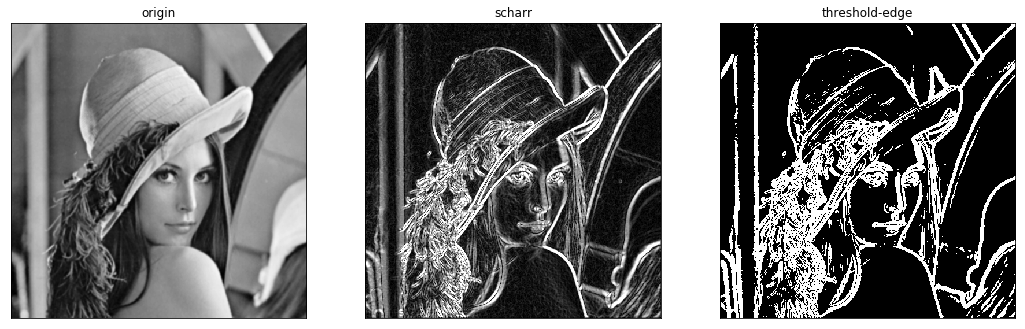

In [4]:
x = cv.Scharr(img,cv.CV_16S,1,0)
y = cv.Scharr(img,cv.CV_16S,0,1)
absX = cv.convertScaleAbs(x)
absY = cv.convertScaleAbs(y)

res = cv.addWeighted(absX,0.5,absY,0.5,0)

otsu1, res_theshould = cv.threshold(res, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1),plt.xticks([]),plt.yticks([]),plt.imshow(img,'gray'),plt.title('origin')
plt.subplot(1,3,2),plt.xticks([]),plt.yticks([]),plt.imshow(res,'gray'),plt.title('scharr')
plt.subplot(1,3,3),plt.xticks([]),plt.yticks([]),plt.imshow(res_theshould,'gray'),plt.title('threshold-edge')

## Canny

一般在求邊緣的時候，抑制雜訊與求邊緣是trade-off  
Sobel與Scharr的運算仰賴雜訊少的情況  
於是有另一演算法Canny的邊緣算法  
揉合了濾波與梯度，另外加入非最大抑制來輔助判斷邊界    
[這篇文章有更詳細的解說](http://monkeycoding.com/?p=622)  

在opencv上使用Canny非常簡易
Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
* img：輸入圖，單通道8位元圖
* threshold1：第一個閾值
* threshold2：第二個閾值
* apertureSize ：Sobel算子的核心大小
* L2gradient ：梯度大小的算法，預設為false

(<matplotlib.axes._subplots.AxesSubplot at 0x2425a8d53c8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5, 1.0, 'inverse img'))

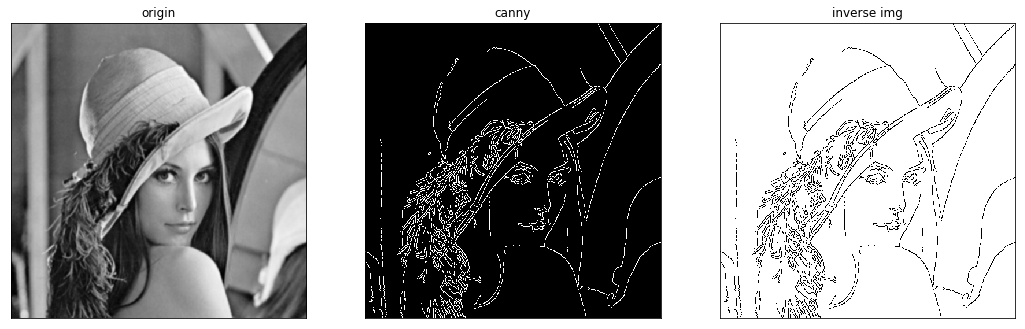

In [5]:
res = cv.Canny(img, 50, 150, 3)
ot, res_inv = cv.threshold(res, 128, 255, cv.THRESH_BINARY_INV)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1),plt.xticks([]),plt.yticks([]),plt.imshow(img,'gray'),plt.title('origin')
plt.subplot(1,3,2),plt.xticks([]),plt.yticks([]),plt.imshow(res,'gray'),plt.title('canny')
plt.subplot(1,3,3),plt.xticks([]),plt.yticks([]),plt.imshow(res_inv,'gray'),plt.title('inverse img')